In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Machine Learning/Praktikum 7/data/college.csv')
df.head()

,StudentID,Gender,Parent_income,IQ,Encourage,Plan
0,4558,male,53900,118,encourage,plan
1,4561,female,24900,87,not encourage,not plan
2,4563,female,65800,93,not encourage,not plan
3,4565,male,11440,117,encourage,plan
4,4567,female,16700,102,not encourage,not plan


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   StudentID      8000 non-null   int64 
 1   Gender         8000 non-null   object
 2   Parent_income  8000 non-null   int64 
 3   IQ             8000 non-null   int64 
 4   Encourage      8000 non-null   object
 5   Plan           8000 non-null   object
dtypes: int64(3), object(3)
memory usage: 375.1+ KB


In [ ]:
df.isnull().sum()

,0
StudentID,0
Gender,0
Parent_income,0
IQ,0
Encourage,0
Plan,0


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df = df.rename(columns={'StudentID':'ID',
                       'Gender':'gender',
                       'Parent_income':'parent_income',
                       'IQ':'IQ',
                       'Encourage':'encourage',
                       'Plan':'plan'})

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ID             8000 non-null   int64 
 1   gender         8000 non-null   object
 2   parent_income  8000 non-null   int64 
 3   IQ             8000 non-null   int64 
 4   encourage      8000 non-null   object
 5   plan           8000 non-null   object
dtypes: int64(3), object(3)
memory usage: 375.1+ KB


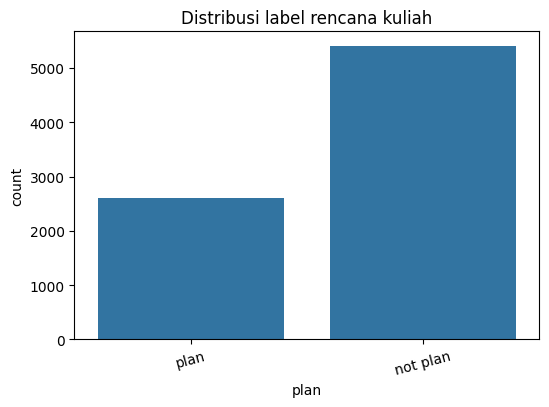

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x='plan', data=df)
plt.title('Distribusi label rencana kuliah')
plt.xticks(rotation=15)
plt.show()

In [ ]:
for col in ['gender', 'encourage', 'plan']:
  df[col] = df[col].astype('category').cat.codes

df.head()

,ID,gender,parent_income,IQ,encourage,plan
0,4558,1,53900,118,0,1
1,4561,0,24900,87,1,0
2,4563,0,65800,93,1,0
3,4565,1,11440,117,0,1
4,4567,0,16700,102,1,0


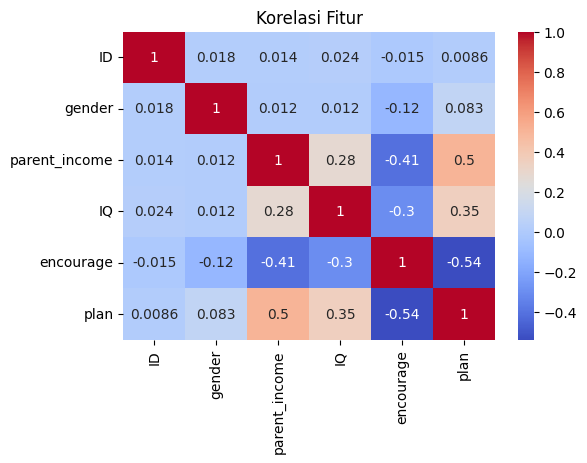

In [ ]:
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Korelasi Fitur')
plt.show()

In [ ]:
feature_cols = ['gender', 'parent_income', 'IQ', 'encourage']
X = df[feature_cols]
y = df['plan']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2,
    random_state=42,
    stratify=y
    )
len(X_train), len(X_test)

(6400, 1600)

In [ ]:
dt = DecisionTreeClassifier(
    criterion='gini',
    max_depth=4,
    random_state=42
)
dt.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=4, random_state=42)

In [ ]:
y_pred = dt.predict(X_test)

# Define the target_names based on the original 'plan' categories
college_classes = ['not plan', 'plan']

print("Akurasi:", round(accuracy_score(y_test, y_pred)*100, 2), "%")
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(
    y_test, y_pred, target_names=college_classes
))

Akurasi: 82.62 %

Confusion Matrix:
 [[960 121]
 [157 362]]

Classification Report:
               precision    recall  f1-score   support

    not plan       0.86      0.89      0.87      1081
        plan       0.75      0.70      0.72       519

    accuracy                           0.83      1600
   macro avg       0.80      0.79      0.80      1600
weighted avg       0.82      0.83      0.82      1600



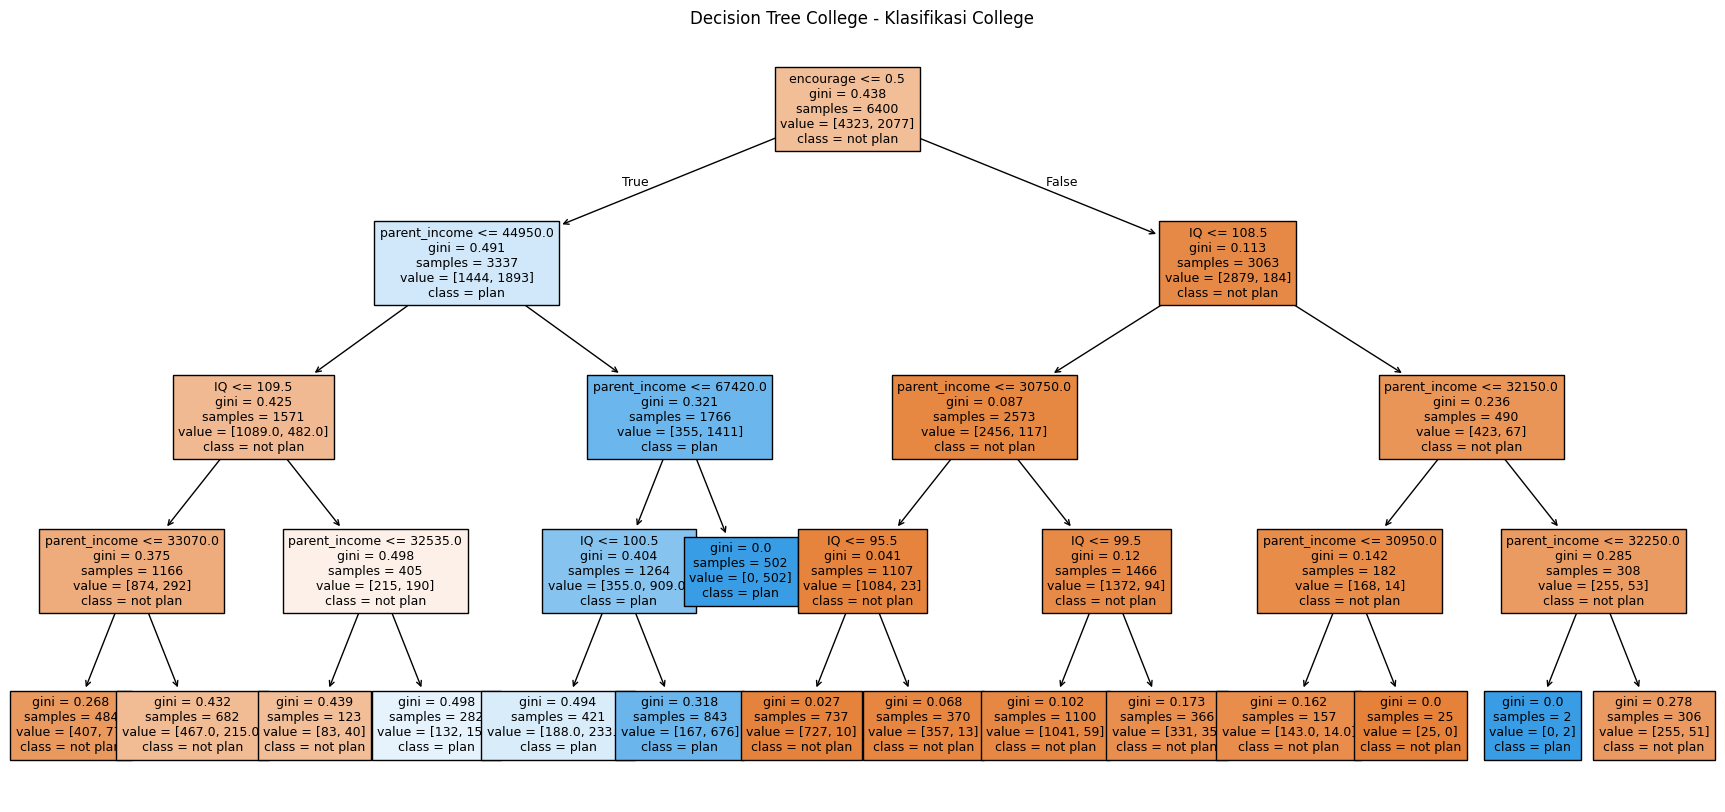

In [ ]:
plt.figure(figsize=(22,10))
plot_tree(
    dt,
    feature_names=feature_cols,
    class_names=college_classes,
    filled=True,
    fontsize=9
)
plt.title('Decision Tree College - Klasifikasi College')
plt.show()